# Kyle Burt
## 4 New NHL Divisions Due to Covid-19 and Their Performance eThe NHL was forced to created 4 divisions to geographically split up the teams. The North division comprised of all the Canadian teams was seen as the “weakest” division. I want to put this to the test, I will do this through comparing the North Divisions stats described below, and the other three American divisions seen as the “stronger” divisions.  his will be able to provide clarity on if Covid-19 divisions affect outcomes of the NHL.e.


 - Compare the top four playoff teams in each division and run an analysis on all of them combined to see how division strength. 
 - Look at a single team in each division( or only 1 division) and see how they play when their Time on Ice is < 50 min and see if they save % scoring chances % was higher etc.. 
 - Look at the top two teams in what was considered the weakest division (North) and 
 - Compare the stats of some of the best and worst teams? 
 
 

In [1]:
import pandas as pd
data = pd.read_csv("../data/raw/Games - Natural Stat TrickTeam Season Totals - Natural Stat Trick.csv")
data

,Game,Team,Unnamed: 2,TOI,CF,CA,CF%,SCF,SCA,SCF%,SH%,SV%,PDO
0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,Limited ReportFull Report,45.583333,33,34,49.25,19,24,44.19,0.00,86.36,0.864
1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,Limited ReportFull Report,45.583333,34,33,50.75,24,19,55.81,13.64,100.00,1.136
2,"2021-01-13 - Blues 4, Avalanche 1",Colorado Avalanche,Limited ReportFull Report,50.683333,44,43,50.57,11,22,33.33,0.00,85.19,0.852
3,"2021-01-13 - Blues 4, Avalanche 1",St Louis Blues,Limited ReportFull Report,50.683333,43,44,49.43,22,11,66.67,14.81,100.00,1.148
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,Limited ReportFull Report,48.600000,47,52,47.47,25,30,45.45,9.09,90.00,0.991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,Limited ReportFull Report,40.966667,32,50,39.02,17,19,47.22,8.70,78.26,0.870
1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,Limited ReportFull Report,47.416667,43,37,53.75,25,17,59.52,3.33,86.36,0.897
1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,Limited ReportFull Report,47.416667,37,43,46.25,17,25,40.48,13.64,96.67,1.103
1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,Limited ReportFull Report,44.483333,43,35,55.13,30,18,62.50,24.00,94.44,1.184


# Task 1: Conduct a EDA

In [2]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
print(f"There are {data.shape} rows and columns in the data")
print(f"The columns in the data set are:  {data.columns}")

There are (1736, 13) rows and columns in the data
The columns in the data set are:  Index(['Game', 'Team', 'Unnamed: 2', 'TOI', 'CF', 'CA', 'CF%', 'SCF', 'SCA',
       'SCF%', 'SH%', 'SV%', 'PDO'],
      dtype='object')


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TOI,1736.0,48.557661,4.241102,31.783333,45.6625,48.933333,51.500,68.200
CF,1736.0,42.956221,9.312960,19.000000,36.0000,43.000000,49.000,78.000
CA,1736.0,42.956221,9.312960,19.000000,36.0000,43.000000,49.000,78.000
CF%,1736.0,50.000035,8.153142,25.270000,44.1600,50.000000,55.840,74.730
SCF,1736.0,20.467166,6.146442,4.000000,16.0000,20.000000,24.000,48.000
SCA,1736.0,20.467166,6.146442,4.000000,16.0000,20.000000,24.000,48.000
SCF%,1736.0,50.000063,10.623748,14.810000,43.1700,50.000000,56.830,85.190
SH%,1736.0,8.458710,6.235143,0.000000,4.1700,7.690000,12.500,50.000
SV%,1736.0,91.541394,6.235157,50.000000,87.5000,92.310000,95.830,100.000
PDO,1736.0,1.000009,0.091223,0.553000,0.9420,1.000000,1.058,1.447


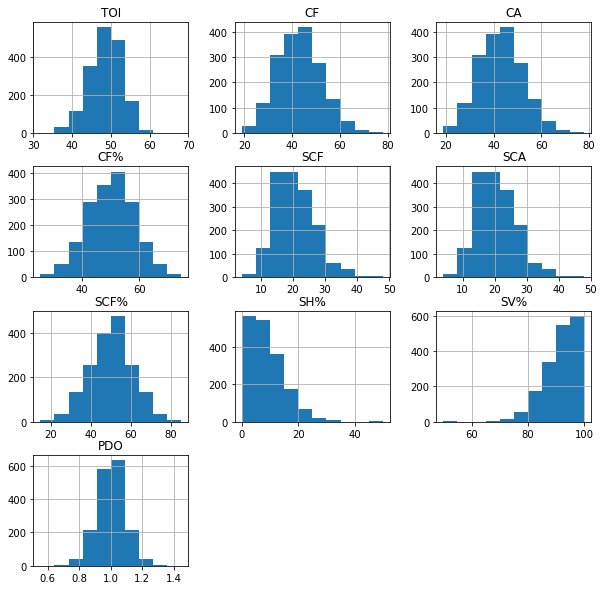

In [4]:
hist= data.hist(bins=10, figsize=(10,10))

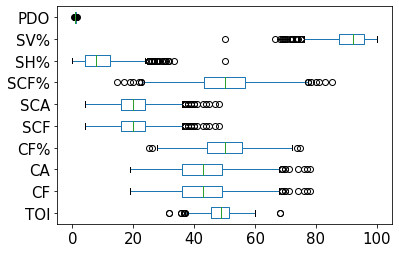

In [5]:
boxplot = data.boxplot(grid=False, vert=False,fontsize=15)

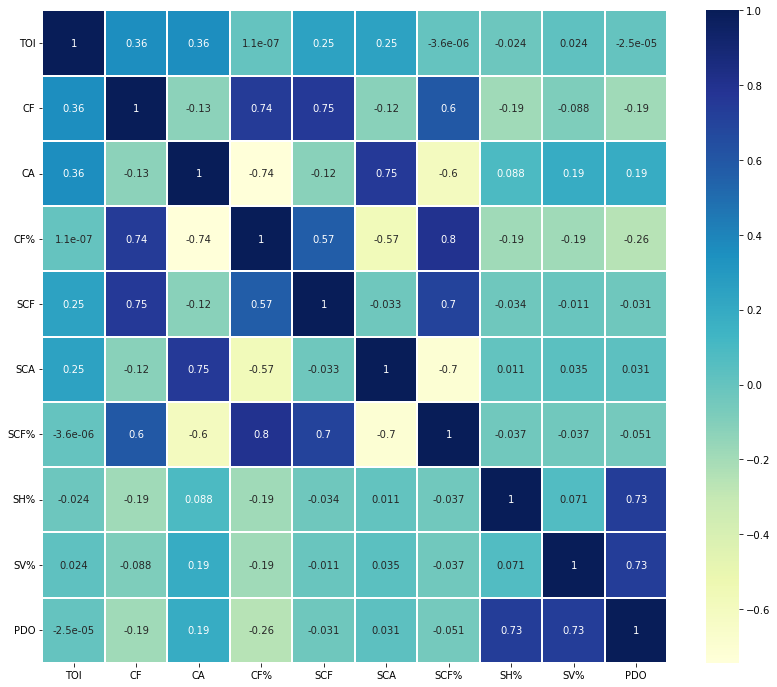

In [6]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

# Task 2: Analysis Pipeline 

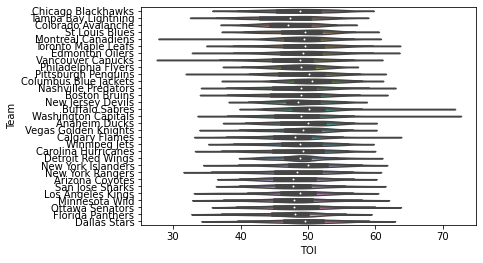

In [103]:
df = data.drop(columns = ['CF', 'CA' , 'SCF' , 'SCA' , 'Unnamed: 2']) 
df
test = sns.violinplot(x="TOI", y="Team", data=df)

##
- I have decided to drop the columns of CF,CA,SCF,SCA, and Unnamed: 2 as many of our stats are combined to produce a percentage, which will be more useful. 

# North Division (Calgary, Edmonton, Montreal, Toronto, Winnipeg, Ottawa, Vancouver) 

In [112]:
northdiv1 = df.drop(data[data.Team.isin([ "Arizona Coyotes", "Buffalo Sabres", "Boston Bruins", "Carolina Hurricanes", "Columbus Blue Jackets", 
                                        "Chicago Blackhawks", "Colorado Avalanche", "Dallas Stars", "Detroit Red Wings", "Florida Panthers",
                                        "Los Angeles Kings", "Minnesota Wild", "Nashville Predators", "Pittsburgh Penguins", "San Jose Sharks", "Tampa Bay Lightning",
                                        "St Louis Blues", "Vegas Golden Knights", "New Jersey Devils", "New York Islanders", "New York Rangers", "Philadelphia Flyers", 
                                        "Washington Capitals", "Anaheim Ducks"])].index)
northdiv = northdiv1.reset_index()
#n1= northdiv.sort_values('TOI')
northdiv
#northdiv.describe().T#[['mean', 'min', 'max']]
#nd = sns.violinplot(x="TOI", y="Team", data=northdiv)

,index,Game,Team,TOI,CF%,SCF%,SH%,SV%,PDO
0,4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,48.600000,47.47,45.45,9.09,90.00,0.991
1,5,"2021-01-13 - Canadiens 4, Maple Leafs 5",Toronto Maple Leafs,48.600000,52.53,54.55,10.00,90.91,1.009
2,6,"2021-01-13 - Canucks 5, Oilers 3",Edmonton Oilers,47.583333,41.76,45.83,12.00,83.87,0.959
3,7,"2021-01-13 - Canucks 5, Oilers 3",Vancouver Canucks,47.583333,58.24,54.17,16.13,88.00,1.041
4,14,"2021-01-14 - Canucks 2, Oilers 5",Edmonton Oilers,44.550000,44.14,45.28,8.33,93.33,1.017
...,...,...,...,...,...,...,...,...,...
387,1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,40.966667,39.02,47.22,8.70,78.26,0.870
388,1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,47.416667,53.75,59.52,3.33,86.36,0.897
389,1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,47.416667,46.25,40.48,13.64,96.67,1.103
390,1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,44.483333,55.13,62.50,24.00,94.44,1.184


In [9]:
#northdiv.boxplot()

In [38]:
print(northdiv['Team'].value_counts())

Montreal Canadiens     56
Toronto Maple Leafs    56
Edmonton Oilers        56
Vancouver Canucks      56
Calgary Flames         56
Winnipeg Jets          56
Ottawa Senators        56
Name: Team, dtype: int64


# East Division (Pittsburgh, Washington, Boston, NY Islanders, NY Rangers, Philadelphia, New Jersey, Buffalo)

In [39]:
eastdiv1 = df.drop(data[data.Team.isin(["Arizona Coyotes", "Carolina Hurricanes", "Columbus Blue Jackets", "Calgary Flames", "Chicago Blackhawks", "Colorado Avalanche", 
                                       "Dallas Stars", "Detroit Red Wings", "Florida Panthers", "Los Angeles Kings", "Minnesota Wild", "Nashville Predators", "San Jose Sharks", 
                                       "Tampa Bay Lightning", "St Louis Blues", "Vegas Golden Knights", "Edmonton Oilers", "Montreal Canadiens","Ottawa Senators",
                                       "Toronto Maple Leafs", "Winnipeg Jets", "Anaheim Ducks", "Vancouver Canucks",])].index)
eastdiv = eastdiv1.reset_index()


eastdiv.describe().T#[['mean', 'min', 'max']]

,count,mean,std,min,25%,50%,75%,max
index,448.0,879.883929,492.247073,8.000000,471.750000,891.500000,1313.250000,1707.000
TOI,448.0,48.965551,4.274779,35.733333,46.004167,49.108333,51.808333,68.200
CF%,448.0,50.000067,7.501659,30.000000,45.000000,50.000000,55.000000,70.000
SCF%,448.0,50.000067,9.548669,14.810000,43.480000,50.000000,56.520000,85.190
SH%,448.0,8.662946,6.507530,0.000000,4.170000,7.690000,12.500000,30.430
SV%,448.0,91.337121,6.507501,69.570000,87.500000,92.310000,95.830000,100.000
PDO,448.0,1.000011,0.092701,0.696000,0.938750,1.000000,1.061250,1.304


In [40]:
print(eastdiv['Team'].value_counts())

Philadelphia Flyers    56
Pittsburgh Penguins    56
Boston Bruins          56
New Jersey Devils      56
Buffalo Sabres         56
Washington Capitals    56
New York Islanders     56
New York Rangers       56
Name: Team, dtype: int64


# Central Division (Carolina, Florida, Tampa Bay, Nashville, Dallas, Chicago, Detroit, Columbus) 

In [102]:
centdiv1 = df.drop(data[data.Team.isin(["Arizona Coyotes", "Buffalo Sabres", "Boston Bruins", "Calgary Flames","Colorado Avalanche"
                                        ,"Los Angeles Kings", "Minnesota Wild","Pittsburgh Penguins", "San Jose Sharks", "St Louis Blues", "Vegas Golden Knights",
                                        "Edmonton Oilers", "Montreal Canadiens", "New Jersey Devils", "New York Islanders", 
                                        "New York Rangers", "Ottawa Senators", "Philadelphia Flyers", "Toronto Maple Leafs",
                                        "Winnipeg Jets", "Washington Capitals", "Anaheim Ducks", "Vancouver Canucks"])].index)
centdiv = centdiv1.reset_index()
centdiv
#centdiv.describe().T#[['mean', 'min', 'max']]
#cd = sns.violinplot(x="TOI", y="Team", data=centdiv)

,index,Game,Team,TOI,CF%,SCF%,SH%,SV%,PDO
0,0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,45.583333,49.25,44.19,0.00,86.36,0.864
1,1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,45.583333,50.75,55.81,13.64,100.00,1.136
2,10,"2021-01-14 - Blue Jackets 1, Predators 3",Columbus Blue Jackets,49.050000,48.04,45.45,4.00,92.59,0.966
3,11,"2021-01-14 - Blue Jackets 1, Predators 3",Nashville Predators,49.050000,51.96,54.55,7.41,96.00,1.034
4,22,"2021-01-14 - Hurricanes 3, Red Wings 0",Carolina Hurricanes,50.266667,66.67,64.58,2.86,100.00,1.029
...,...,...,...,...,...,...,...,...,...
443,1697,"2021-05-10 - Hurricanes 0, Predators 5",Nashville Predators,45.883333,49.25,64.86,5.88,100.00,1.059
444,1700,"2021-05-10 - Lightning 0, Panthers 4",Florida Panthers,38.083333,46.38,44.00,15.79,100.00,1.158
445,1701,"2021-05-10 - Lightning 0, Panthers 4",Tampa Bay Lightning,38.083333,53.62,56.00,0.00,84.21,0.842
446,1704,"2021-05-10 - Stars 5, Blackhawks 4",Chicago Blackhawks,50.666667,28.13,17.07,30.77,92.50,1.233


In [14]:
#print(centdiv['Team'].value_counts())

# West Division (Colorado, Vegas, Minnesota, St. Louis, Arizona, Los Angeles, San Jose, Anaheim) 

In [122]:
westdiv1= df.drop(data[data.Team.isin(["Buffalo Sabres", "Boston Bruins", "Carolina Hurricanes", 
                                        "Columbus Blue Jackets", "Calgary Flames", "Chicago Blackhawks",  "Dallas Stars", "Detroit Red Wings", "Florida Panthers",
                                       "Nashville Predators", "Pittsburgh Penguins","Tampa Bay Lightning","Edmonton Oilers", "Montreal Canadiens",
                                        "New Jersey Devils", "New York Islanders", "New York Rangers", "Ottawa Senators", 
                                        "Philadelphia Flyers", "Toronto Maple Leafs", "Winnipeg Jets", "Washington Capitals","Vancouver Canucks"])].index)
westdiv= westdiv1.reset_index()
westdiv

westdiv.describe()#[['mean', 'min', 'max']]
#wd = sns.violinplot(x="CF%", y="Team", data=westdiv)


,index,TOI,CF%,SCF%,SH%,SV%,PDO
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,878.785714,48.281324,50.000022,50.000045,8.761027,91.239063,1.000004
std,504.951863,3.997755,8.228267,10.575155,6.197312,6.197236,0.091776
min,2.000000,36.866667,26.140000,19.050000,0.000000,50.000000,0.553000
25%,448.250000,45.450000,44.782500,44.090000,4.550000,86.960000,0.944000
50%,894.500000,48.650000,50.000000,50.000000,7.945000,92.055000,1.000000
75%,1299.250000,51.254167,55.217500,55.910000,13.040000,95.450000,1.056000
max,1725.000000,58.000000,73.860000,80.950000,50.000000,100.000000,1.447000


In [61]:
#print(westdiv['Team'].value_counts())

<AxesSubplot:>

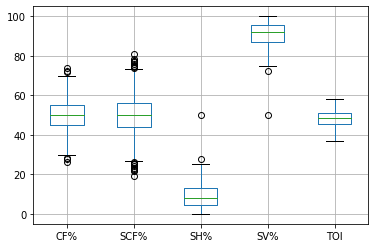

In [126]:
 westdiv.boxplot(['CF%','SCF%','SH%','SV%','TOI'])

## All Divisons

In [62]:
data_frames = [northdiv, centdiv, eastdiv, westdiv] 
